In [1]:
'''3_12 加载路透社数据集
2019_12_6
'''
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
len(train_labels)

8982

In [5]:
len(test_labels)

2246

In [6]:
'''3_13 将索引解码为新闻文本
2019_12_6
'''
word_index = reuters.get_word_index()
reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])
#注意，索引减去了3，因为0、1、2是为"padding"(填充)、"start of sequence"(序列开始)、"unknown"(未知)分别保留的索引
decoded_newswire = ' '.join([reversed_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
train_labels[10]

3

In [8]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [9]:
'''3_14 编码数据
2019_12_6
'''
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

#将训练数据向量化
x_train = vectorize_sequences(train_data)
#将测试数据向量化
x_test = vectorize_sequences(test_data)

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

#将训练标签向量化
one_hot_train_labels = to_one_hot(train_labels)
#将测试标签向量化
one_hot_test_labels = to_one_hot(test_labels)

In [11]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [12]:
'''3_15 模型定义
2019_12_6
'''
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
'''3_16 编译模型
2019_12_6
'''
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
'''3_17 留出验证集
2019_12_6
'''
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [15]:
len(partial_y_train)

7982

In [16]:
'''3_18 训练模型
2019_12_6
'''
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 273us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 171us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 175us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 171us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 169us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 173us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 173us/step - loss: 0.4581 - a

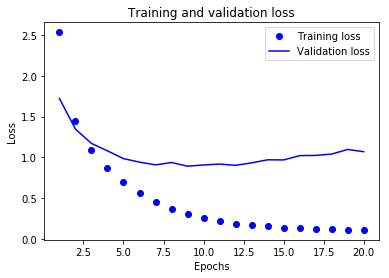

In [18]:
'''3_19 绘制训练损失和验证损失
2019_12_6
'''
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

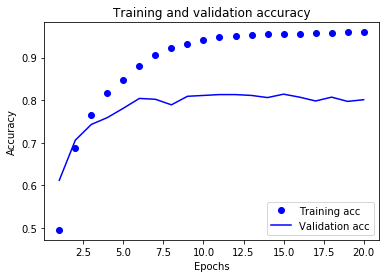

In [19]:
'''3_20 绘制训练精度和验证精度
2019_12_6
'''
#清空图像
plt.clf()

acc = history.history['acc']
val_acc =history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#加入图例
plt.legend()

plt.show()

In [34]:
'''3_21 从头开始重新训练一个模型
2019_12_6
'''
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 261us/step - loss: 2.7830 - acc: 0.4977 - val_loss: 1.8291 - val_acc: 0.6190
Epoch 2/9
7982/7982 [==============================] - 1s 179us/step - loss: 1.4982 - acc: 0.6882 - val_loss: 1.3450 - val_acc: 0.7100
Epoch 3/9
7982/7982 [==============================] - 1s 180us/step - loss: 1.0848 - acc: 0.7692 - val_loss: 1.1579 - val_acc: 0.7580
Epoch 4/9
7982/7982 [==============================] - 1s 169us/step - loss: 0.8477 - acc: 0.8171 - val_loss: 1.0362 - val_acc: 0.7780
Epoch 5/9
7982/7982 [==============================] - 1s 171us/step - loss: 0.6740 - acc: 0.8597 - val_loss: 0.9642 - val_acc: 0.7990
Epoch 6/9
7982/7982 [==============================] - 1s 181us/step - loss: 0.5463 - acc: 0.8877 - val_loss: 0.9446 - val_acc: 0.7980
Epoch 7/9
7982/7982 [==============================] - 1s 175us/step - loss: 0.4385 - acc: 0.9109 - val_loss: 0.9085 - val_acc: 0.8050
Epoch 8

In [35]:
results

[1.0043938601537146, 0.7818343722703515]

In [36]:
import copy
test_labels_copy = copy.copy(test_labels)
#np.random.shuffle(x) 现场修改序列，改变自身内容。（类似洗牌，打乱顺序）
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1918967052537845

In [37]:
hits_array

array([False, False, False, ...,  True, False, False])

In [38]:
'''3_22 在新数据上生成预测结果
2019_12_6
'''
prediction = model.predict(x_test)

In [39]:
prediction[0].shape

(46,)

In [40]:
np.sum(prediction[0])

1.0000002

In [41]:
np.argmax(prediction[0])

3